In [1]:
DATA_PATH = '../../data/02_scenes/'

## Test w/ Object Detection

## Test w/ Foreground Detection

In [2]:
import numpy as np
import cv2

In [3]:
import matplotlib.pyplot as plt

In [84]:
def mask_foreground(img):
    mask = np.zeros(img.shape[:2],np.uint8)
    
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    rect = (0,0,740,720) #x,y,w,h
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    fg = img*mask2[:,:,np.newaxis]

    plt.subplot(121), plt.imshow(fg)
    plt.title("grabcut"), plt.xticks([]), plt.yticks([])
    plt.subplot(122),
    plt.imshow(img)
    plt.title("original"), plt.xticks([]), plt.yticks([])

    plt.show()

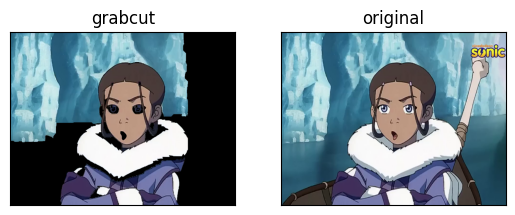

In [85]:
mask_foreground(frames[0])

## Frame Extraction

In [10]:
def get_frame_durations(cap, fps):
    """A function that returns the list of durations where to save the frames"""
    
    # get the clip duration by dividing number of frames by the number of frames per second
    clip_duration = cap.get(cv2.CAP_PROP_FRAME_COUNT) / cap.get(cv2.CAP_PROP_FPS)
    
    # use np.arange() to make floating-point steps
    return np.arange(0, clip_duration, 1 / fps)

def split_video(video_file):
    
    # read in video   
    cap = cv2.VideoCapture(video_file)
    # get video FPS
    fps = min(cap.get(cv2.CAP_PROP_FPS), SAVING_FRAMES_PER_SECOND)

    # get the list of duration spots to save
    saving_frames_durations = get_frame_durations(cap, fps)
    
    # start the loop
    frames = []
    count = 0
    while True:
        is_read, frame = cap.read()
        if is_read:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
        else:
            break
        """if not is_read:
            # break out of the loop if there are no frames to read
            break
        # get the duration by dividing the frame count by the FPS
        frame_duration = count / fps
        try:
            # get the earliest duration to save
            closest_duration = saving_frames_durations[0]
        except IndexError:
            # the list is empty, all duration frames were saved
            break
        if frame_duration >= closest_duration:
            # if closest duration is less than or equals the frame duration, 
            # then save the frame
            frame_duration_formatted = format_timedelta(timedelta(seconds=frame_duration))
            cv2.imwrite(os.path.join(filename, f"frame{frame_duration_formatted}.jpg"), frame) 
            # drop the duration spot from the list, since this duration spot is already saved
            try:
                saving_frames_durations.pop(0)
            except IndexError:
                pass
        # increment the frame count
        count += 1"""
    return frames

In [113]:
SAVING_FRAMES_PER_SECOND = 30
cap_path = f'{DATA_PATH}atla_s1e1-Scene-151.mp4'
frames = split_video(cap_path)

In [115]:
# display each frame
print(len(frames))

132


In [117]:
unique_frames = []
for i,frame in enumerate(frames):
    if i == 0:
        prev_frame = frame
        unique_frames.append(frame)
    else:
        if np.all([frame,prev_frame]):
            continue
        else:
            prev_frame = frame
            unique_frames.append(frame)

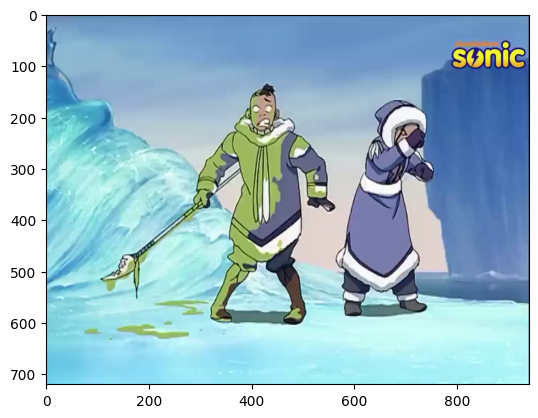

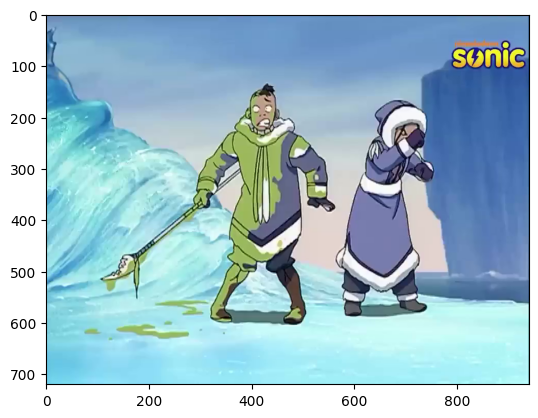

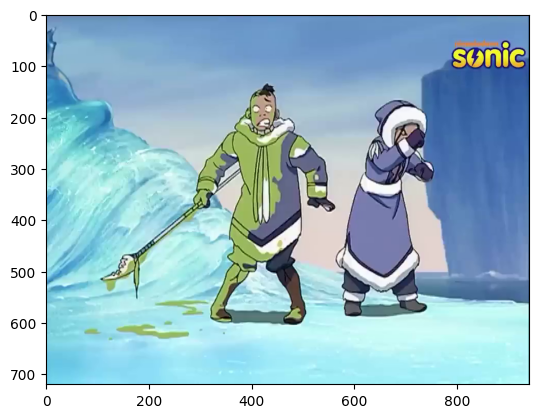

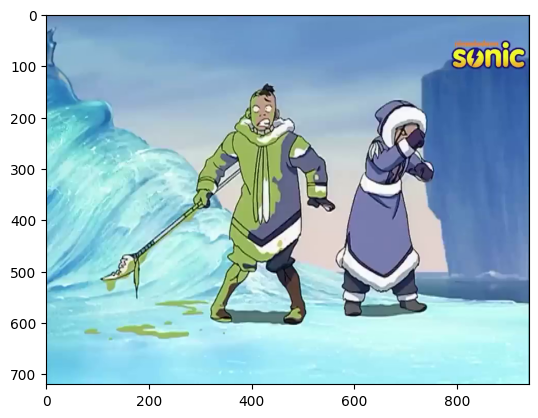

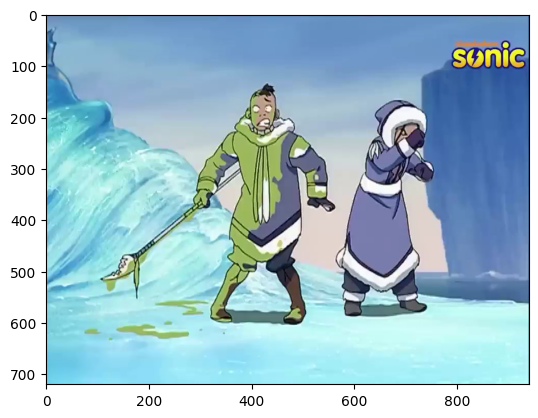

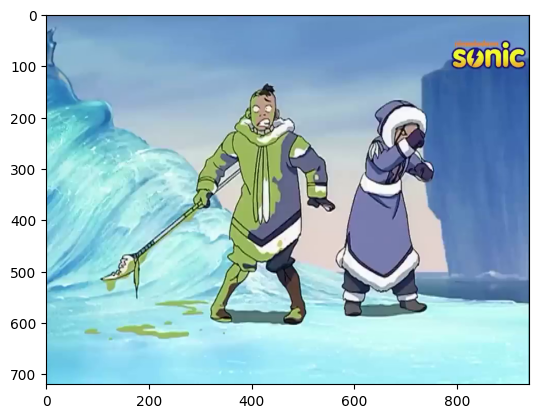

In [118]:
for i,frame in enumerate(frames):
    if i>5:
        break
    plt.imshow(frame)
    plt.show()

In [119]:
total_diff = []
new_frames = 1
for i,frame in enumerate(frames):
    if i == 0:
        prev_frame = frame
        continue
    diff = cv2.absdiff(frame, prev_frame)
    
    if np.mean(diff)>2:
        total_diff.append(np.mean(diff))
        prev_frame = frame
        new_frames+=1
    else:
        total_diff.append(0)

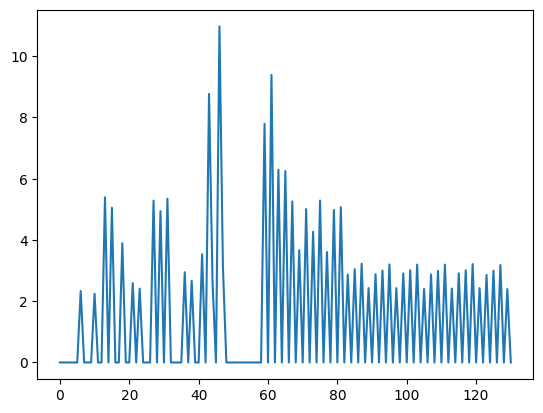

In [120]:
plt.plot(total_diff)

In [121]:
new_frames

54

## Optical Flow

## Test?

In [129]:
diff = cv2.absdiff(cv2.cvtColor(frames[0], cv2.COLOR_BGR2GRAY), cv2.cvtColor(frames[-1], cv2.COLOR_BGR2GRAY))

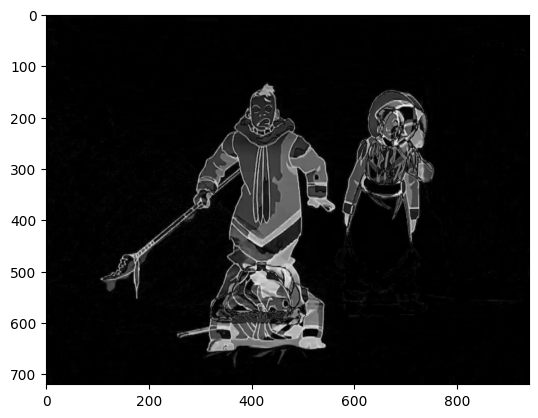

In [132]:
plt.imshow(diff,'gray')

In [150]:
total_diff = None
new_frames = 1
for i,frame in enumerate(frames):
    if i == 0:
        prev_frame = frame
        continue
    diff = cv2.absdiff(cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY), cv2.cvtColor(prev_frame, cv2.COLOR_RGB2GRAY))
    
    if total_diff is None:
        total_diff = diff
    else:
        total_diff += diff
    prev_frame=frame

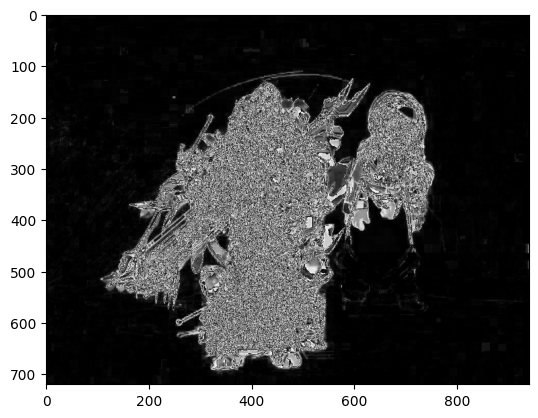

In [151]:
plt.imshow(total_diff,'gray')

In [154]:
total_diff

array([[10, 10,  8, ...,  2,  2,  2],
       [12, 12, 11, ...,  1,  1,  2],
       [12, 12, 10, ...,  1,  1,  1],
       ...,
       [ 1,  2,  2, ...,  0,  0,  0],
       [ 1,  2,  2, ...,  0,  0,  0],
       [ 1,  2,  2, ...,  0,  0,  0]], dtype=uint8)

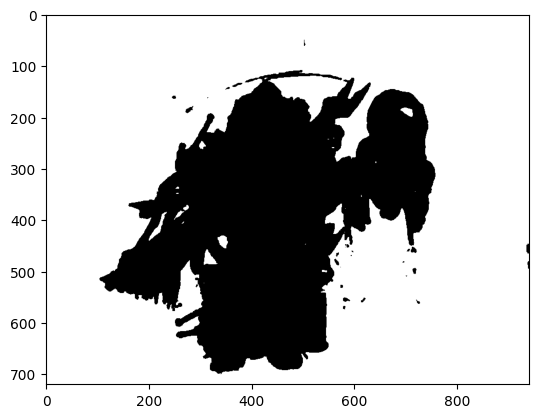

In [177]:
smooth_diff = cv2.blur(total_diff,(5,5))
mask = smooth_diff<=30
#mask = cv2.blur(mask,(5,5))
plt.imshow(mask,'gray')

In [178]:
masked_frames = []
for frame in frames:
    masked_frames.append(np.multiply(frame,mask[:,:,np.newaxis]))

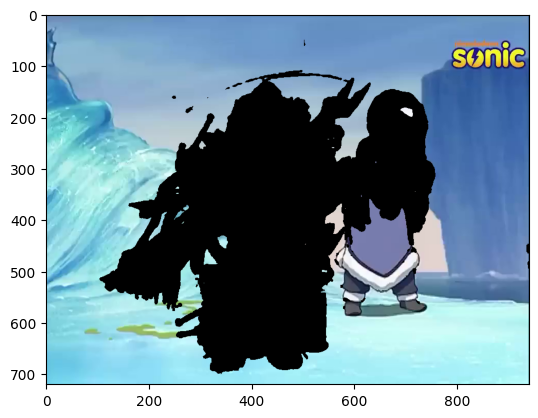

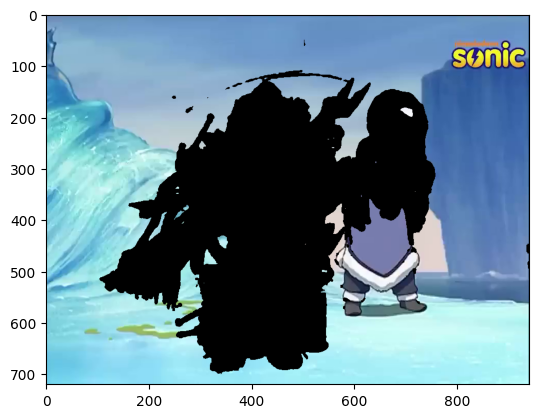

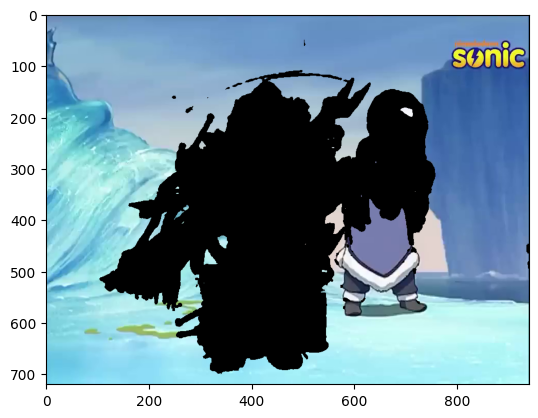

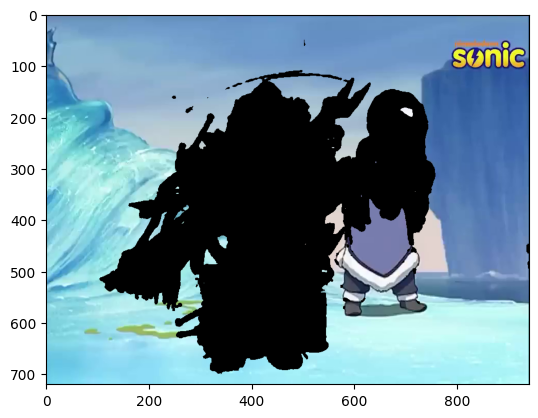

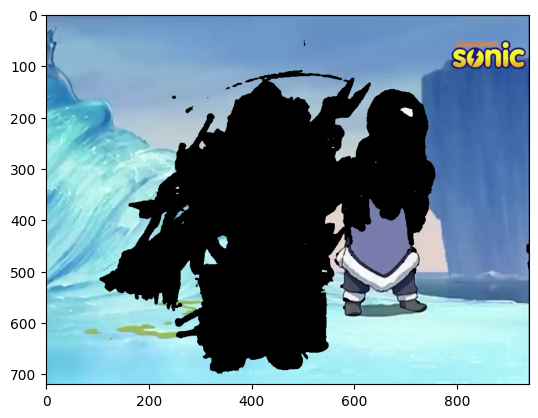

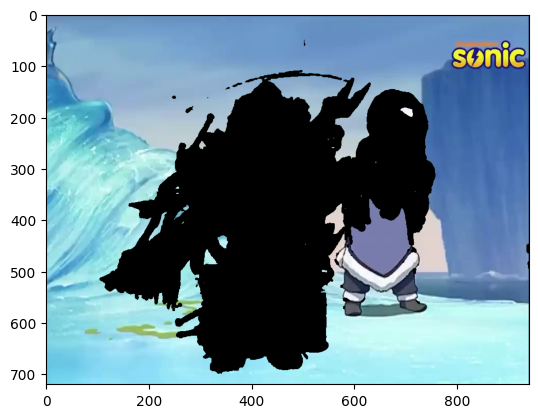

In [179]:
for i,frame in enumerate(masked_frames):
    if i>5:
        break
    plt.imshow(frame)
    plt.show()

## Mean Filter

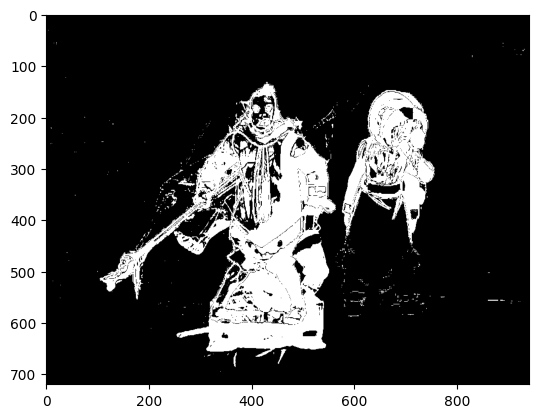

In [227]:
theta = 15
avg_frame = np.mean(frames,axis=0).astype(np.uint8)
for frame in frames:
    diff = cv2.absdiff(cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY), cv2.cvtColor(avg_frame, cv2.COLOR_RGB2GRAY))>theta
    plt.imshow(diff,'gray')
    break

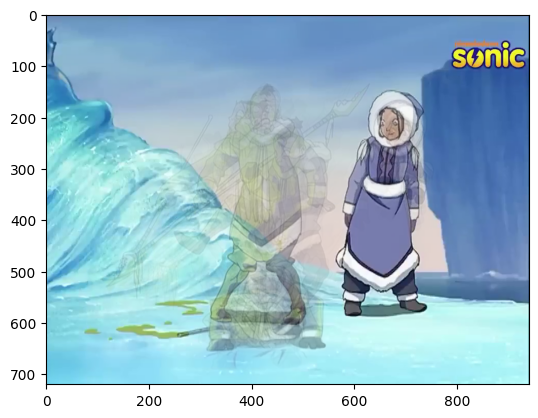

In [210]:
plt.imshow(avg_frame)

## Running Gaussian Average

In [211]:
test = cv2.cvtColor(avg_frame, cv2.COLOR_RGB2GRAY)

In [208]:
avg_frame.shape

(720, 940, 3)